In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('Cleaned_Data5.csv')

C:\Users\batka\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.rename(columns={'TotalPrice' : 'TotalSales'}, inplace = True)

In [4]:
df2 = df.groupby(['CustomerID'])['InvoiceNo'].count().reset_index().sort_values('InvoiceNo', ascending =False)
df2.head()

,CustomerID,InvoiceNo
4041,17841.0,7812
1894,14911.0,5896
1299,14096.0,5128
330,12748.0,4458
1673,14606.0,2759


In [5]:
df3 = df.groupby(['CustomerID'])['TotalSales'].sum().reset_index().sort_values('TotalSales', ascending =False)
df3.head()

,CustomerID,TotalSales
1702,14646.0,279489.02
4232,18102.0,256438.49
3757,17450.0,187322.17
1894,14911.0,132458.73
55,12415.0,123725.45


In [6]:
df4 = df.groupby('CustomerID').agg({'InvoiceDate':'nunique'})
df4.head()

,InvoiceDate
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [7]:
merged = pd.merge(df2, df3, on = 'CustomerID', how = 'inner')
merged.head()

,CustomerID,InvoiceNo,TotalSales
0,17841.0,7812,39869.05
1,14911.0,5896,132458.73
2,14096.0,5128,57120.91
3,12748.0,4458,28405.56
4,14606.0,2759,11633.35


In [8]:
merged = pd.merge(merged, df4, on = 'CustomerID', how ='inner')

In [9]:
merged.head()

,CustomerID,InvoiceNo,TotalSales,InvoiceDate
0,17841.0,7812,39869.05,113
1,14911.0,5896,132458.73,146
2,14096.0,5128,57120.91,17
3,12748.0,4458,28405.56,115
4,14606.0,2759,11633.35,89


In [10]:
merged.set_index('CustomerID', inplace = True)

In [11]:
merged.head()

,InvoiceNo,TotalSales,InvoiceDate
CustomerID,,,
17841.0,7812,39869.05,113
14911.0,5896,132458.73,146
14096.0,5128,57120.91,17
12748.0,4458,28405.56,115
14606.0,2759,11633.35,89


In [12]:
Q1 = merged.TotalSales.quantile(0.05)
Q3 = merged.TotalSales.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.TotalSales>= Q1-1.5*IQR)&(merged.TotalSales<=Q3+1.5*IQR)]

In [13]:
Q1 = merged.InvoiceNo.quantile(0.05)
Q3 = merged.InvoiceNo.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.InvoiceNo>= Q1-1.5*IQR)&(merged.InvoiceNo<=Q3+1.5*IQR)]

In [14]:
Q1 = merged.InvoiceDate.quantile(0.05)
Q3 = merged.InvoiceDate.quantile(0.95)
IQR = Q3 - Q1
merged = merged[(merged.InvoiceDate>= Q1-1.5*IQR)&(merged.InvoiceDate<=Q3+1.5*IQR)]

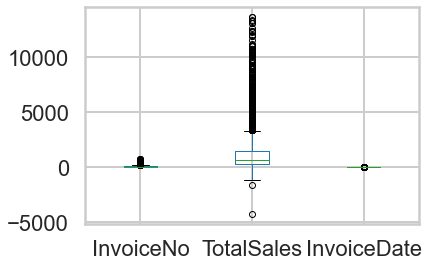

In [15]:
merged.boxplot()

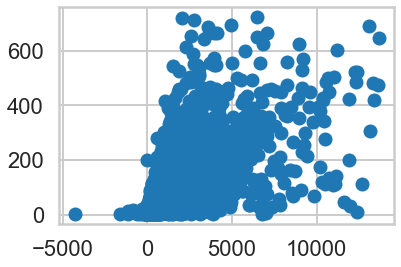

In [16]:
plt.scatter(merged['TotalSales'],merged['InvoiceNo'])

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
merged_scaled =scaler.fit_transform(merged)
merged_scaled.shape


(4285, 3)

In [18]:
kmeans = KMeans(n_clusters=4, max_iter = 50)
kmeans.fit_predict(merged_scaled)

array([2, 2, 2, ..., 0, 0, 0])

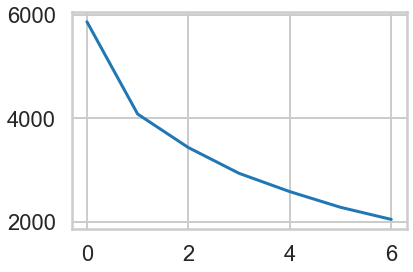

In [19]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    ssd.append(kmeans.inertia_)
    

plt.plot(ssd)

In [20]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
   
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(merged_scaled)
    
    cluster_labels = kmeans.labels_
    
  
    silhouette_avg = silhouette_score(merged_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6775637419547333
For n_clusters=3, the silhouette score is 0.5588300762929965
For n_clusters=4, the silhouette score is 0.49155616887398357
For n_clusters=5, the silhouette score is 0.4946080073850222
For n_clusters=6, the silhouette score is 0.4397188153332567
For n_clusters=7, the silhouette score is 0.4421271694645698
For n_clusters=8, the silhouette score is 0.4436582302541228


In [21]:
kmeans = KMeans(n_clusters=6, max_iter = 50)
kmeans.fit(merged_scaled)
kmeans.labels_
merged['clusterN'] = kmeans.labels_
merged.head()

,InvoiceNo,TotalSales,InvoiceDate,clusterN
CustomerID,,,,
17338.0,725,6461.79,8,4
18283.0,721,2045.53,14,4
16764.0,712,2749.95,13,4
15547.0,695,4910.60,12,4
17735.0,690,13110.02,18,2


In [30]:
merged.to_csv('Cleaned_Data11.csv')

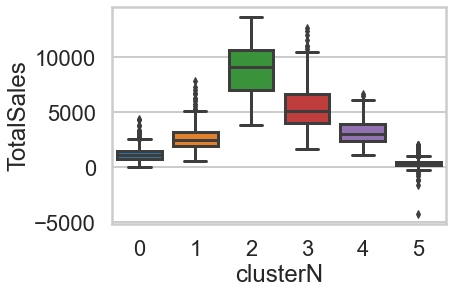

In [22]:
sns.boxplot(x='clusterN', y='TotalSales', data=merged)

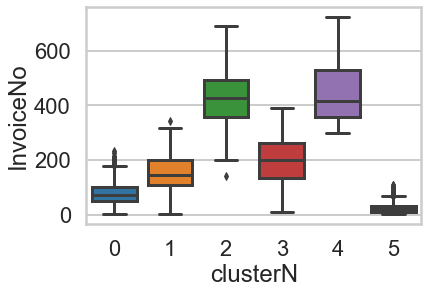

In [23]:
sns.boxplot(x='clusterN', y='InvoiceNo', data=merged)

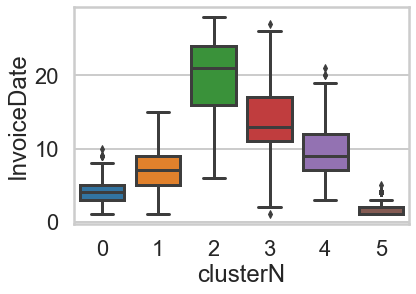

In [24]:
sns.boxplot(x='clusterN', y='InvoiceDate', data=merged)

In [25]:
clusters = merged.groupby(['clusterN'])['TotalSales'].sum().reset_index().sort_values('TotalSales', ascending =False)

In [26]:
clusters.head(6)

,clusterN,TotalSales
1,1,1407157.191
0,0,1220899.181
3,3,992508.270
5,5,891551.372
2,2,557515.430
4,4,307813.370


In [27]:
clustersI = merged.groupby(['clusterN'])['InvoiceDate'].count().reset_index().sort_values('InvoiceDate', ascending =False)
clustersI.head(6)

,clusterN,InvoiceDate
5,5,2378
0,0,1035
1,1,535
3,3,180
4,4,96
2,2,61


In [28]:
Cluster = merged.groupby('clusterN').agg({'InvoiceDate':'nunique', 'TotalSales':'sum','InvoiceNo':'count'})
Cluster.head(6)

,InvoiceDate,TotalSales,InvoiceNo
clusterN,,,
0,10,1220899.181,1035
1,15,1407157.191,535
2,18,557515.430,61
3,25,992508.270,180
4,19,307813.370,96
5,5,891551.372,2378


In [29]:
Cluster.sort_values('InvoiceNo', ascending =False)

,InvoiceDate,TotalSales,InvoiceNo
clusterN,,,
5,5,891551.372,2378
0,10,1220899.181,1035
1,15,1407157.191,535
3,25,992508.270,180
4,19,307813.370,96
2,18,557515.430,61
